Question 1:

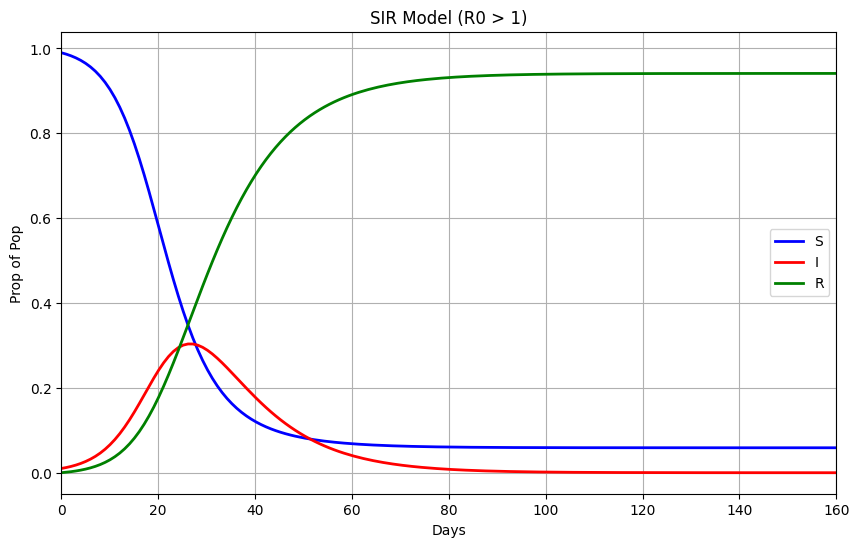

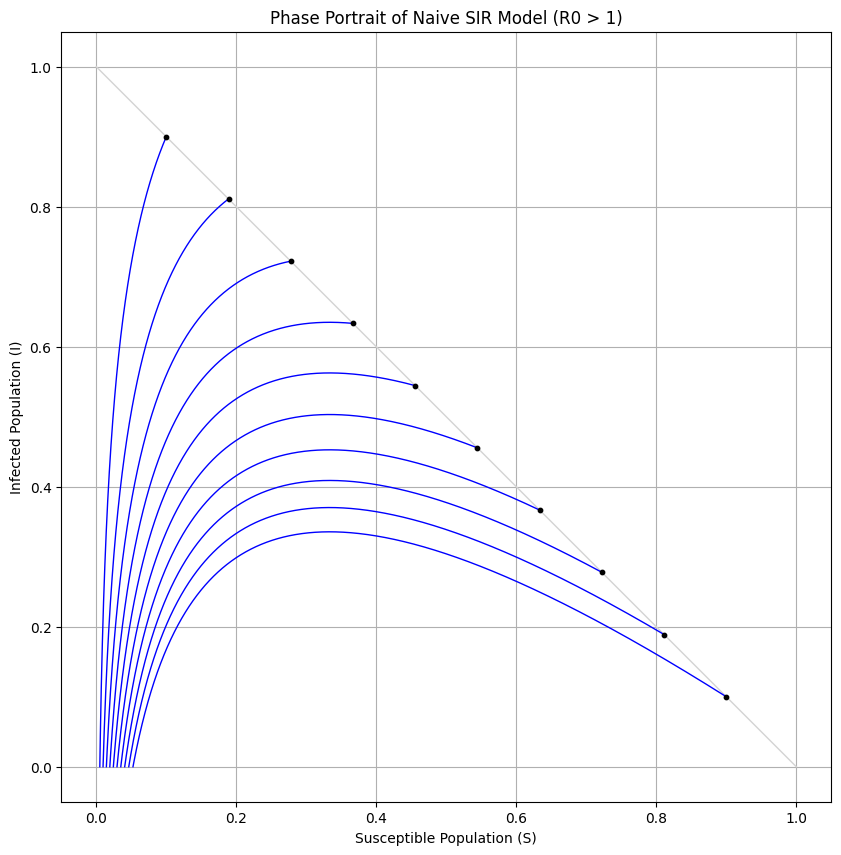

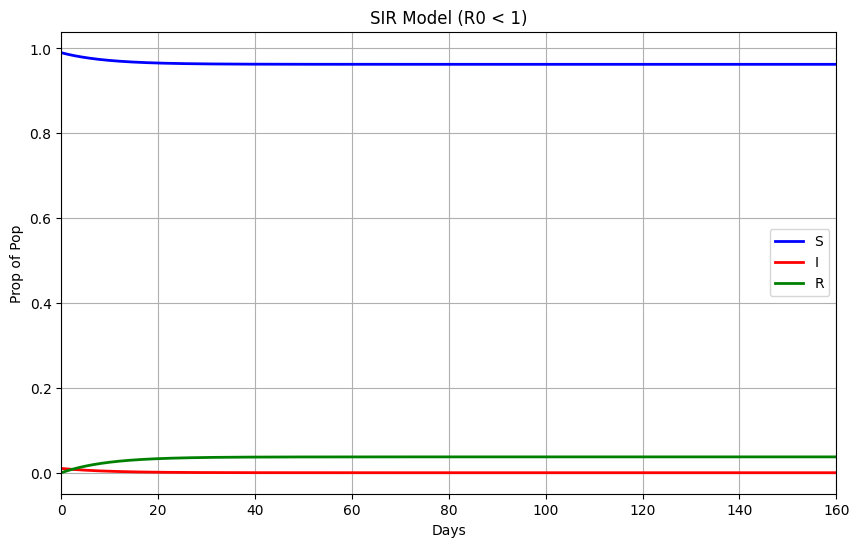

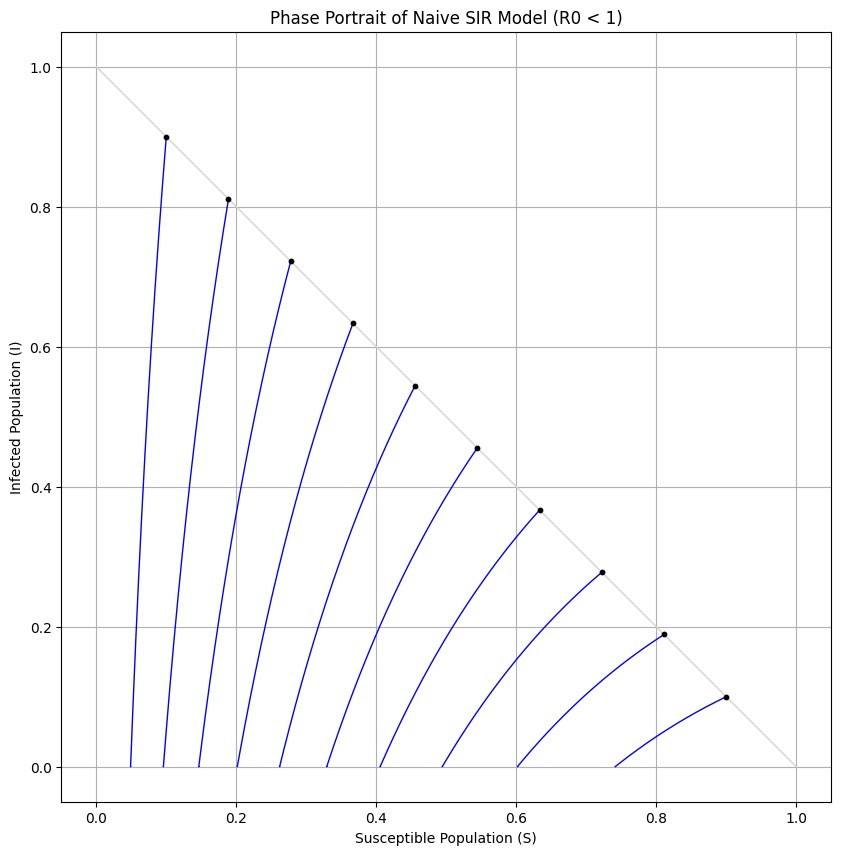

In [17]:
# Question 1.1

# Epidemic Scenario

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the SIR model equations
def SIR_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = (beta * S * I) - (gamma * I)
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Initial conditions for SIR model
S0 = 0.99  
I0 = 0.01  
R0 = 0.0  
initial_conditions = [S0, I0, R0]

# Time array for simulation
t = np.linspace(0, 160, 160)

# Parameters for epidemic scenario (R0 > 1)
beta = 0.3
gamma = 0.1

# Solve the ODE using odeint
results = odeint(SIR_model, initial_conditions, t, args=(beta, gamma))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, results[:, 0], 'b-', linewidth=2, label='S')
plt.plot(t, results[:, 1], 'r-', linewidth=2, label='I')
plt.plot(t, results[:, 2], 'g-', linewidth=2, label='R')
plt.xlabel('Days')
plt.ylabel('Prop of Pop')
plt.title('SIR Model (R0 > 1)')
plt.xlim(0, 160)
plt.legend()
plt.grid(True)
plt.show()

# Oscillatory Behavior for Epidemic Scenario

import matplotlib.cm as cm

# Function to plot phase trajectories for different initial conditions
def plot_trajectories(S_init, I_init, t, beta, gamma):
    for i, (S0, I0) in enumerate(zip(S_init, I_init)):
        R0 = 1 - S0 - I0
        y0 = [S0, I0, R0]
        solution = odeint(SIR_model, y0, t, args=(beta, gamma))
        S, I, R = solution.T
        plt.plot(S, I, lw=1, color='blue', label=f'Trajectory {i+1}')
        plt.scatter(S[0], I[0], color='black', s=10, zorder=5)

# Time array for phase plot
t = np.linspace(0, 200, 10000)

# Initial conditions for multiple trajectories
I_init = np.linspace(0.9, 0.1, 10)
S_init = np.ones_like(I_init) - I_init # Ensures S + I = 1

# Plot phase portrait
plt.figure(figsize=(10, 10))
plt.plot([0, 1], [1, 0], 'lightgrey', lw=1, label='S + I = 1')
plot_trajectories(S_init, I_init, t, beta, gamma)
plt.title('Phase Portrait of Naive SIR Model (R0 > 1)')
plt.xlabel('Susceptible Population (S)')
plt.ylabel('Infected Population (I)')
plt.grid(True)
plt.axis('square')
plt.show()

# Non-Epidemic

# Parameters for non-epidemic scenario (R0 < 1)
beta = 0.3
gamma = 0.4

# Solve the ODE using new parameters
results = odeint(SIR_model, initial_conditions, t, args=(beta, gamma))

# Plot the results for non-epidemic scenario
plt.figure(figsize=(10, 6))
plt.plot(t, results[:, 0], 'b-', linewidth=2, label='S')
plt.plot(t, results[:, 1], 'r-', linewidth=2, label='I')
plt.plot(t, results[:, 2], 'g-', linewidth=2, label='R')
plt.xlabel('Days')
plt.ylabel('Prop of Pop')
plt.title('SIR Model (R0 < 1)')
plt.xlim(0, 160)
plt.legend()
plt.grid(True)
plt.show()

# Oscillatory Behavior for Non-Epidemic Scenario

import matplotlib.cm as cm

# Function to plot phase trajectories for non-epidemic scenario
def plot_trajectories(S_init, I_init, t, beta, gamma):
    for i, (S0, I0) in enumerate(zip(S_init, I_init)):
        R0 = 1 - S0 - I0
        y0 = [S0, I0, R0]
        solution = odeint(SIR_model, y0, t, args=(beta, gamma))
        S, I, R = solution.T
        plt.plot(S, I, lw=1, color='blue', label=f'Trajectory {i+1}')
        plt.scatter(S[0], I[0], color='black', s=10, zorder=5)

# Time array for phase plot
t = np.linspace(0, 200, 10000)

# Initial conditions for multiple trajectories
I_init = np.linspace(0.9, 0.1, 10)
S_init = np.ones_like(I_init) - I_init # Ensure S + I = 1

# Plot phase portrait for non-epidemic scenario
plt.figure(figsize=(10, 10))
plt.plot([0, 1], [1, 0], 'lightgrey', lw=1, label='S + I = 1')
plot_trajectories(S_init, I_init, t, beta, gamma)
plt.title('Phase Portrait of Naive SIR Model (R0 < 1)')
plt.xlabel('Susceptible Population (S)')
plt.ylabel('Infected Population (I)')
plt.grid(True)
plt.axis('square')
plt.show()

# I have not added both the Epidemic Code and the Non-Epidemic Code for all questions. I have added it here, to show the difference. 
# After this, the text in my paper reflects the values I have used, which should hopefully be enough. 
# To state it again: for all graphs where the Non-Epidemic scenario happens, changing the gamma to 0.1 replicates the graphs shown in the paper.

Day   Historical Data     Fitted Data
  0             1                1
  1             3                3
  2             8               11
  3            28               35
  4            75               98
  5           221              206
  6           291              283
  7           255              275
  8           235              222
  9           190              164
 10           125              116
 11            70               80
 12            28               54
 13            12               37
 14             5               25


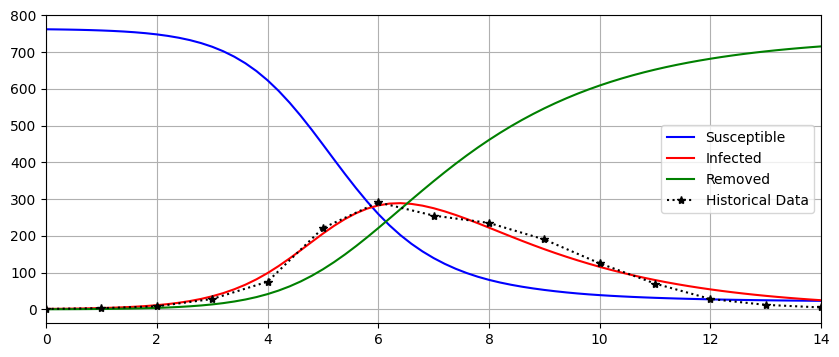

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

# Historical infection data
data = [1, 3, 8, 28, 75, 221, 291, 255, 235, 190, 125, 70, 28, 12, 5]

# Wrapper function to use SIR model with solve_ivp
def model_wrapper(t, y, beta, gamma):
    return SIR_model(y, t, beta, gamma)

# Objective function to minimize the sum of squared differences
def sumsq(p):
    beta, gamma = p
    sol = solve_ivp(model_wrapper, [0, 14], [762, 1, 0], args=(beta, gamma), t_eval=np.arange(0, 14.2, 0.2), method='RK45')
    return sum((sol.y[1][::5] - data)**2)

# Perform optimization to find the best beta and gamma
msol = minimize(sumsq, [0.001, 1], method='Nelder-Mead')
beta, gamma = msol.x

# Solve the SIR model with optimized beta and gamma
sol = solve_ivp(model_wrapper, [0, 14], [762, 1, 0], args=(beta, gamma), t_eval=np.arange(0, 14.2, 0.2), method='RK45')

# Interpolate the infected data for comparison with historical data
infected_interpolated = np.interp(np.arange(0, 15, 1), sol.t, sol.y[1])

# Print comparison of historical vs. fitted data
print("Day", "  Historical Data", "    Fitted Data")
for day in range(15):
    print(f"{day:3d} {data[day]:13d} {infected_interpolated[day]:16.0f}")

# Plot results: Susceptible, Infected, Removed, and Historical Data
fig = plt.figure(figsize=(10, 4))
plt.plot(sol.t, sol.y[0], "b-", label='Susceptible')
plt.plot(sol.t, sol.y[1], "r-", label='Infected')
plt.plot(sol.t, sol.y[2], "g-", label='Removed')
plt.plot(np.arange(0, 15), data, "k*:", label='Historical Data')
plt.xlim(0, 14)
plt.grid(True)
plt.legend()
plt.show()

Question 2

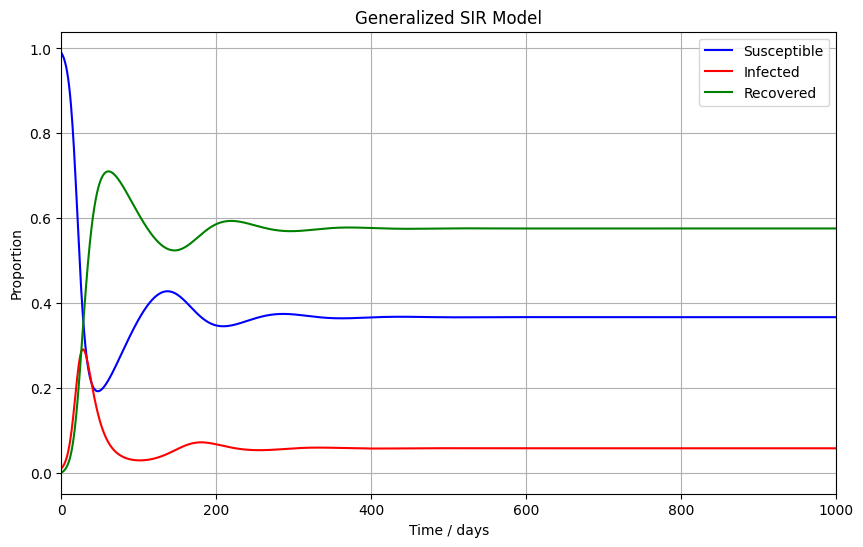

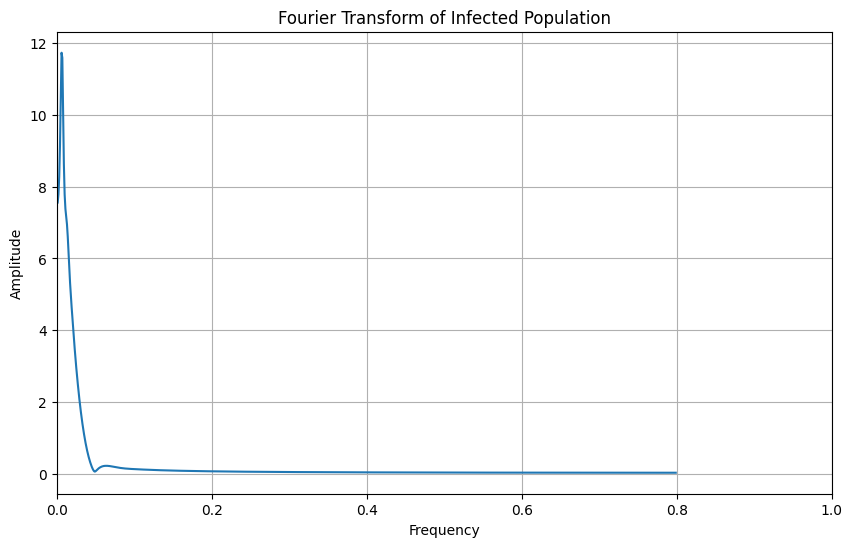

Peak Frequency: 0.00599625
Peak Amplitude: 11.737524135662772


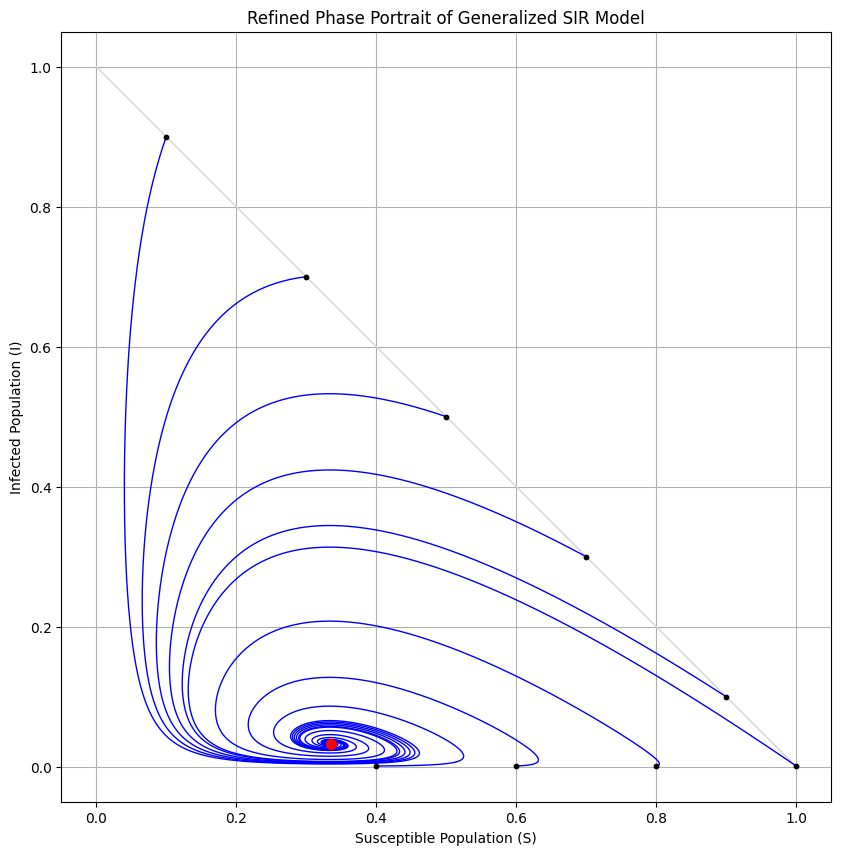

In [22]:
# Question 2.1

import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.fft import fft, fftfreq

# Extended SIR model incorporating birth and death rates (mu)
def extended_SIR_model(y, t, beta, gamma, mu):
    S, I, R = y
    dSdt = mu - (beta * S * I) - (mu * S)
    dIdt = (beta * S * I) - (gamma * I) - (mu * I)
    dRdt = (gamma * I) - (mu * R)
    return [dSdt, dIdt, dRdt]

# Parameters for the generalized SIR model
beta = 0.3
gamma = 0.1
mu = 0.01 
t = np.linspace(0, 1000, 1600)

# Solve the extended SIR model
results = odeint(extended_SIR_model, initial_conditions, t, args=(beta, gamma, mu))

# Plot results for Susceptible, Infected, and Recovered populations
plt.figure(figsize=(10, 6))
plt.plot(t, results[:, 0], 'b', label='Susceptible')
plt.plot(t, results[:, 1], 'r', label='Infected')
plt.plot(t, results[:, 2], 'g', label='Recovered')
plt.xlabel('Time / days')
plt.ylabel('Proportion')
plt.title('Generalized SIR Model')
plt.xlim(0, 1000)
plt.legend()
plt.grid(True)
plt.show()

# Fourier Analysis to detect oscillatory behavior in the Infected population
I_data = results[:,1]
I_fft = fft(I_data)
I_fft = fft(I_data - np.mean(I_data)) # Detrend before FFT
frequencies = fftfreq(len(t), t[1] - t[0])
positive_frequencies = (frequencies[frequencies > 0])
amplitudes = (np.abs(I_fft[frequencies > 0]))

# Plot the frequency and amplitude spectrum
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies, amplitudes)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of Infected Population')
plt.xlim(0, 1)
plt.grid(True)
plt.show()

# Identify frequency and amplitude from FFT
peak_idx = np.argmax(amplitudes)
peak_frequency = positive_frequencies[peak_idx]
peak_amplitude = amplitudes[peak_idx]

print(f"Peak Frequency: {peak_frequency}")
print(f"Peak Amplitude: {peak_amplitude}")

# Refined SIR model with oscillatory behavior for phase portrait analysis

def extended_sir_model_oscillatory(y, t, beta, gamma, mu):
    S, I, R = y
    dSdt = -beta * S * I + mu * (1 - S)
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I - mu * R
    return [dSdt, dIdt, dRdt]

# Function to plot phase portraits for various initial conditions
def plot_trajectories(S_init, I_init, t, beta, gamma, mu):
    for i, (S0, I0) in enumerate(zip(S_init, I_init)):
        R0 = 1 - S0 - I0
        y0 = [S0, I0, R0]
        solution = odeint(extended_sir_model_oscillatory, y0, t, args=(beta, gamma, mu))
        S, I, R = solution.T
        plt.plot(S, I, lw=1, color='blue', label=f'Trajectory {i+1}')
        plt.scatter(S[0], I[0], color='black', s=10, zorder=5)
    plt.scatter(S[-1], I[-1], color='red', s=50, zorder=5, label='Spiral Center')

# Parameters for the phase portrait, taken from the slides from week 3.
beta = 1
gamma = 1/3
mu = 1/60
t = np.linspace(0, 200, 10000)

# Initial conditions for phase portrait
I_init = np.linspace(0.9, 0.1, 5)
S_init = np.ones_like(I_init) - I_init
S_list = np.array([1, 0.8, 0.6, 0.4])
I_list = np.full_like(S_list, 0.001)

# Combine additional initial conditions for richer phase portraits
S_init_combined = np.concatenate([S_init, S_list])
I_init_combined = np.concatenate([I_init, I_list])

# Plot phase plot of generalized SIR model
plt.figure(figsize=(10, 10))
plt.plot([0, 1], [1, 0], 'lightgrey', lw=1, label='S + I = 1')
plot_trajectories(S_init_combined, I_init_combined, t, beta, gamma, mu)
plt.title('Refined Phase Portrait of Generalized SIR Model')
plt.xlabel('Susceptible Population (S)')
plt.ylabel('Infected Population (I)')
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('square')
plt.show()

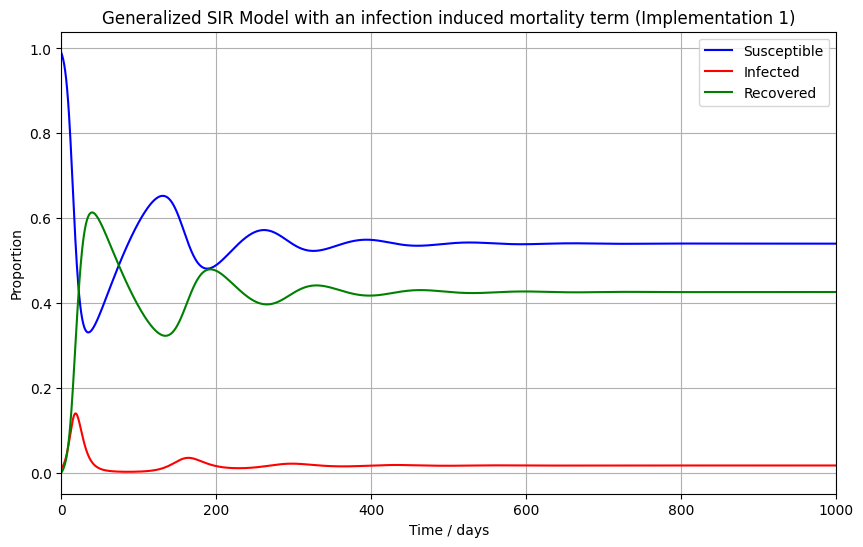

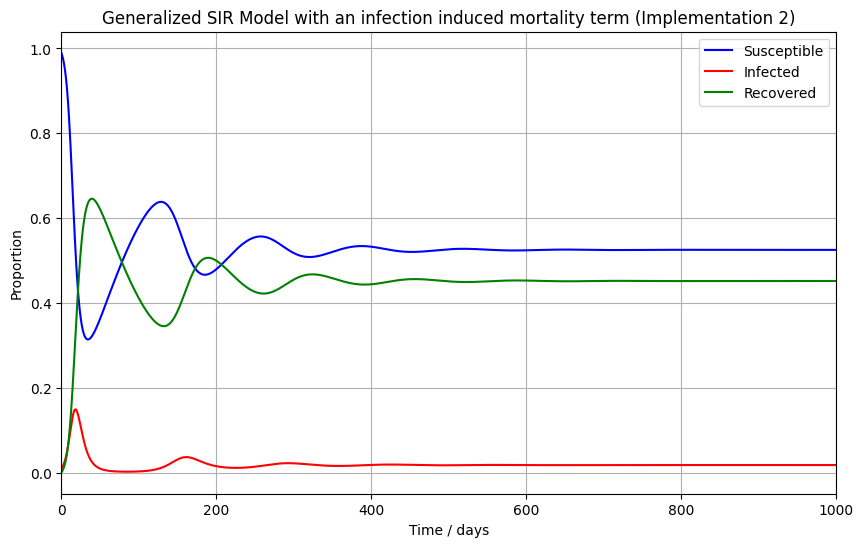

In [21]:
# Question 2.2
# First approach: Adding a separate disease-induced mortality term (-rho*I) without combining recovery and death rates

def extended_death_SIR_model(y, t, beta, gamma, mu, rho):
    S, I, R = y
    dSdt = mu - (beta * S * I) - (mu * S)
    dIdt = (beta * S * I) - (gamma * I) - (mu * I)  - (rho * I)
    dRdt = (gamma * I) - (mu * R)
    return [dSdt, dIdt, dRdt]

# Parameters for the model
beta = 0.5
gamma = 0.25
mu = 0.01 
rho = 0.01
t = np.linspace(0, 1000, 1600)

# Solve the model using odeint
results = odeint(extended_death_SIR_model, initial_conditions, t, args=(beta, gamma, mu, rho))

# Plot results for Susceptible, Infected, and Recovered populations
plt.figure(figsize=(10, 6))
plt.plot(t, results[:, 0], 'b', label='Susceptible')
plt.plot(t, results[:, 1], 'r', label='Infected')
plt.plot(t, results[:, 2], 'g', label='Recovered')
plt.xlabel('Time / days')
plt.ylabel('Proportion')
plt.title('Generalized SIR Model with an infection induced mortality term (Implementation 1)')
plt.legend()
# plt.ylim(0, 0.05)
plt.xlim(0, 1000)
plt.grid(True)
plt.show()

# For the question, increase rho till 1 and observe the effect on the model

# Second approach: Combining recovery and death rates into one term, adjusted for the probability of death due to infection

def extra_extended_death_SIR_model(y, t, beta, gamma, mu, rho):
    S, I, R = y
    dSdt = mu - (beta * S * I) - (mu * S)
    dIdt = (beta * S * I) - (((gamma + mu)/(1 - rho)) * I)
    dRdt = (gamma * I) - (mu * R)
    return [dSdt, dIdt, dRdt]

# Same parameters for the second approach (done seperatly for ease of testing)
beta = 0.5
gamma = 0.25
mu = 0.01 
rho = 0.01
t = np.linspace(0, 1000, 1600)

# Solve the second model
results = odeint(extra_extended_death_SIR_model, initial_conditions, t, args=(beta, gamma, mu, rho))

# Plot results for the second approach
plt.figure(figsize=(10, 6))
plt.plot(t, results[:, 0], 'b', label='Susceptible')
plt.plot(t, results[:, 1], 'r', label='Infected')
plt.plot(t, results[:, 2], 'g', label='Recovered')
plt.xlabel('Time / days')
plt.ylabel('Proportion')
plt.title('Generalized SIR Model with an infection induced mortality term (Implementation 2)')
plt.xlim(0, 1000)
plt.legend()
# plt.ylim(0, 0.05
plt.grid(True)
plt.show()

# For the question, increase rho till 1 and observe the effect on the model


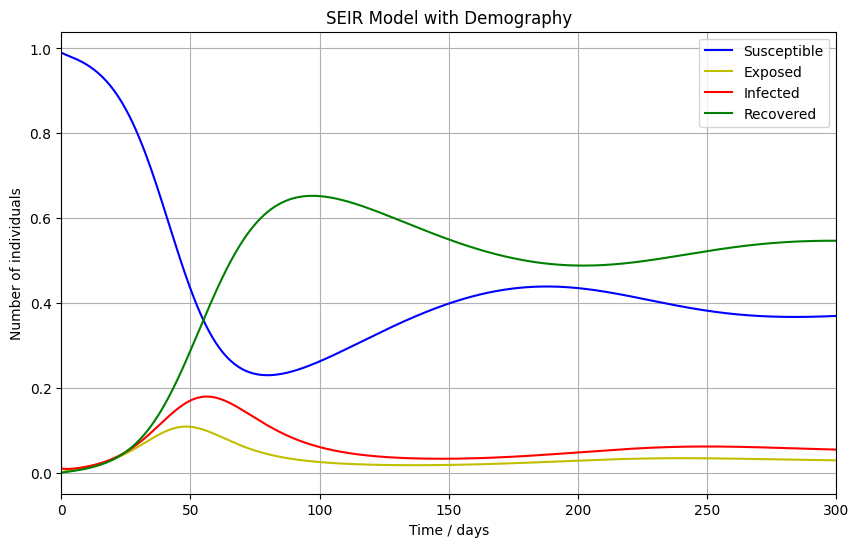

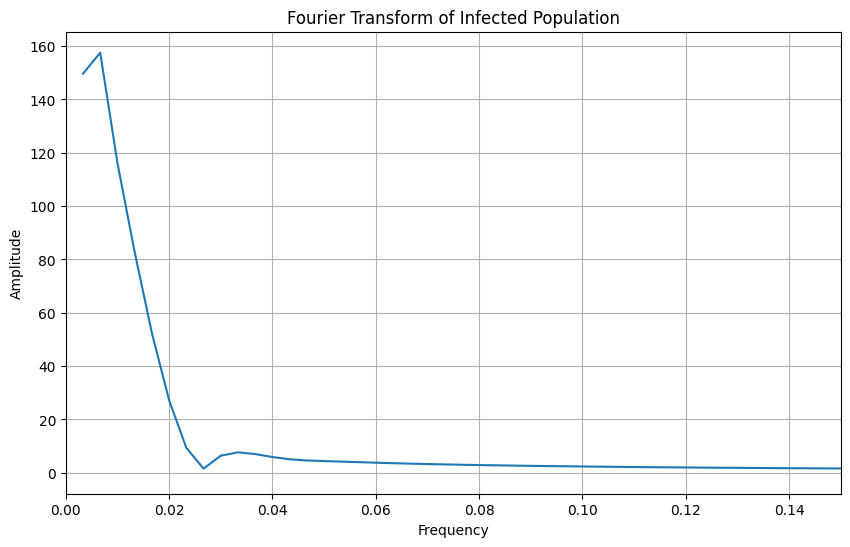

Peak Frequency: 0.006666249999999999
Peak Amplitude: 157.50688192641962


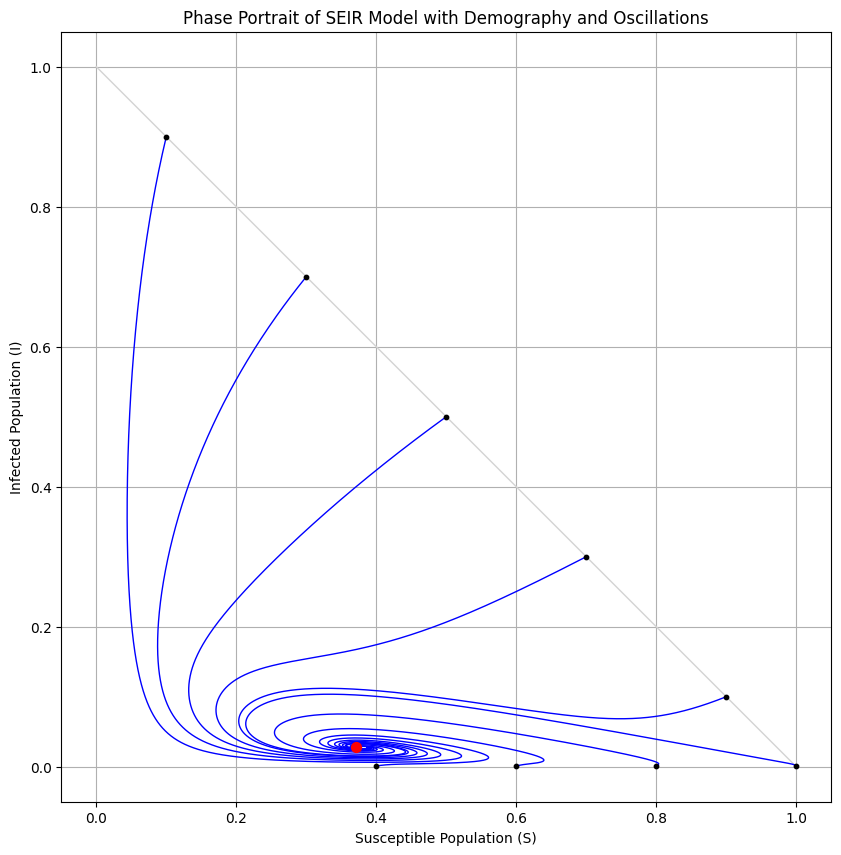

In [26]:
# Question 3.1

# SEIR model with demography, model based on Chapter 2.5 from the Keeling&Rohani book.

def seir_model_with_demography(y, t, beta, sigma, gamma, mu):
    S, E, I, R = y
    dSdt = mu - (((beta * I) + mu) * S)
    dEdt = (beta * S * I) - ((mu + sigma) * E)
    dIdt = (sigma * E) - ((mu + gamma) * I)
    dRdt = (gamma * I) - (mu * R)
    return [dSdt, dEdt, dIdt, dRdt]

# Model parameters
beta = 0.3
sigma = 0.2
gamma = 0.1
mu = 0.01

# Initial conditions
S0 = 0.99 
I0 = 0.01
E0 = 0.0
R0 = 0.0  
initial_conditions = [S0, E0, I0, R0]

# Time points
t = np.linspace(0, 300, 16000)

# Solving the SEIR model
results = odeint(seir_model_with_demography, initial_conditions, t, args=(beta, sigma, gamma, mu))

# Plotting results for Susceptible, Exposed, Infected, and Recovered populations
plt.figure(figsize=(10, 6))
plt.plot(t, results[:, 0], 'b', label='Susceptible')
plt.plot(t, results[:, 1], 'y', label='Exposed')
plt.plot(t, results[:, 2], 'r', label='Infected')
plt.plot(t, results[:, 3], 'g', label='Recovered')
plt.title('SEIR Model with Demography')
plt.xlabel('Time / days')
plt.ylabel('Number of individuals')
plt.legend()
plt.xlim(0, 300)
plt.grid(True)
plt.show()

# Fourier Analysis on the Infected population

I_data = results[:,1] # Using the Exposed (E) population for FFT
I_fft = fft(I_data) # Normalize the data
I_fft = fft(I_data - np.mean(I_data))
frequencies = fftfreq(len(t), t[1] - t[0])
positive_frequencies = (frequencies[frequencies > 0])
amplitudes = (np.abs(I_fft[frequencies > 0]))

# Plot Fourier Transform
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies, amplitudes)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of Infected Population')
plt.xlim(0, 0.15)
plt.grid(True)
plt.show()

# Identifying frequency and amplitude from Fourier analysis

peak_idx = np.argmax(amplitudes)
peak_frequency = positive_frequencies[peak_idx]
peak_amplitude = amplitudes[peak_idx]

print(f"Peak Frequency: {peak_frequency}")
print(f"Peak Amplitude: {peak_amplitude}")

# Oscillatory behavior: plot phase plots for various initial conditions

def plot_trajectories(S_init, E_init, I_init, t, beta, sigma, gamma, mu):
    for i, (S0, E0, I0) in enumerate(zip(S_init, E_init, I_init)):
        R0 = 1 - S0 - E0 - I0 
        y0 = [S0, E0, I0, R0]
        solution = odeint(seir_model_with_demography, y0, t, args=(beta, sigma, gamma, mu))
        S, E, I, R = solution.T
        color = cm.viridis(i / len(S_init))
        plt.plot(S, I, lw=1, color='blue', label=f'Trajectory {i+1}')
        plt.scatter(S[0], I[0], color='black', s=10, zorder=5)
    plt.scatter(S[-1], I[-1], color='red', s=50, zorder=5, label='Spiral Center')

# Parameters from week 3 in the slides
beta = 1
sigma = 1/5
gamma = 1/3
mu = 1/60

# Time points for oscillation analysis
t = np.linspace(0, 200, 10000)

# Initial conditions for S, E, I
I_init = np.linspace(0.9, 0.1, 5)
E_init = np.zeros_like(I_init)
S_init = np.ones_like(I_init) - I_init

# Additional trajectories for phase plot
S_list = np.array([1, 0.8, 0.6, 0.4])
I_list = np.full_like(S_list, 0.001)
E_list = np.full_like(S_list, 0.01)
S_init_combined = np.concatenate([S_init, S_list])
I_init_combined = np.concatenate([I_init, I_list])
E_init_combined = np.concatenate([E_init, E_list])

# Plot phase portrait of SEIR model with oscillations
plt.figure(figsize=(10, 10))
plt.plot([0, 1], [1, 0], 'lightgrey', lw=1, label='S + I = 1')
plot_trajectories(S_init_combined, E_init_combined, I_init_combined, t, beta, sigma, gamma, mu)
plt.title('Phase Portrait of SEIR Model with Demography and Oscillations')
plt.xlabel('Susceptible Population (S)')
plt.ylabel('Infected Population (I)')
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('square')
plt.show()


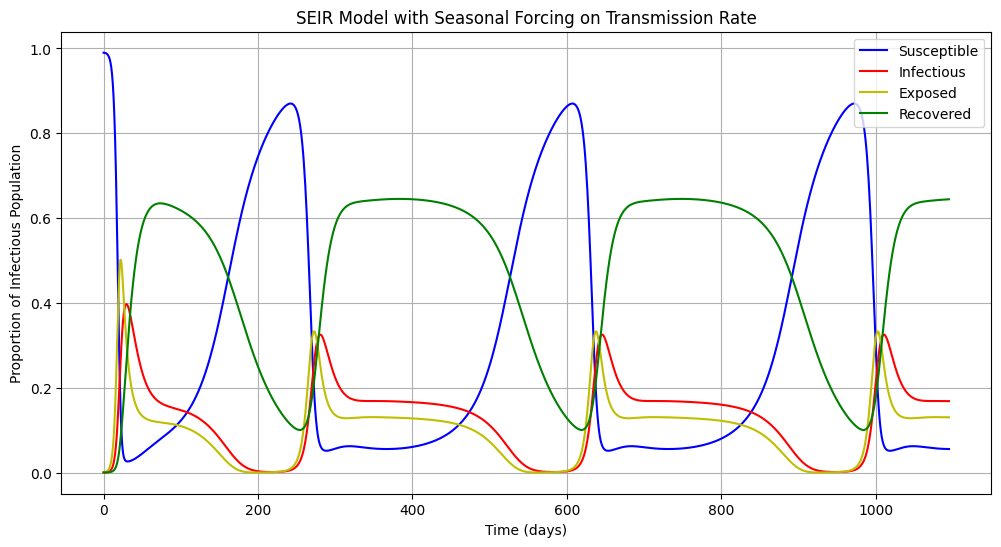

In [16]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Source: https://daphnia.ecology.uga.edu/drakelab/wp-content/uploads/2014/07/seasonality.pdf

# SEIR model with seasonal variation in transmission rate (beta)
def seir_model_with_seasonality(y, t, mu, beta0, beta1, sigma, gamma):
    S, E, I, R = y
    beta = beta0 * (1 + beta1 * np.cos(2 * np.pi * t / 365))
    dSdt = mu * (1 - S) - beta * S * I
    dEdt = beta * S * I - (sigma + mu) * E
    dIdt = sigma * E - (gamma + mu) * I
    dRdt = gamma * I - mu * R
    return [dSdt, dEdt, dIdt, dRdt]

# Model parameters
mu = 1/50
beta0 = 1
beta1 = 1
sigma = 1/8
gamma = 1/13

# Initial conditions
S0, E0, I0, R0 = 0.99, 0.001, 0.0001, 0.0009
y0 = [S0, E0, I0, R0]

# Time points over 3 years
times = np.linspace(0, 365 * 3, 365 * 3)

# Solving the SEIR model with seasonal forcing
solution = odeint(seir_model_with_seasonality, y0, times, args=(mu, beta0, beta1, sigma, gamma))
S, E, I, R = solution.T

# Plotting SEIR results with seasonality
plt.figure(figsize=(12, 6))
plt.plot(times, S, label='Susceptible', color='b')
plt.plot(times, I, label='Infectious', color='r')
plt.plot(times, E, label='Exposed', color='y')
plt.plot(times, R, label='Recovered', color='g')
plt.xlabel('Time (days)')
plt.ylabel('Proportion of Infectious Population')
plt.title('SEIR Model with Seasonal Forcing on Transmission Rate')
plt.legend()
plt.grid(True)
plt.show()